## ОБРАБОТКА ДАННЫХ

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Параметры
IMG_SIZE = 128  # Размер изображений после ресайза
DATA_DIR = "/content/drive/MyDrive/data"
CATEGORIES = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]

# Функция для загрузки и обработки изображений
def load_and_preprocess_data(data_dir, categories, img_size):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_label = categories.index(category)
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (img_size, img_size))
                data.append([image, class_label])
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")
    return data

# Загрузка и обработка данных
print("Loading data...")
data = load_and_preprocess_data(DATA_DIR, CATEGORIES, IMG_SIZE)

# Перемешивание данных
np.random.shuffle(data)

# Разделение изображений и меток
X = np.array([item[0] for item in data])
y = np.array([item[1] for item in data])

# Нормализация изображений
X = X / 255.0

# Преобразование меток в one-hot encoding
y = to_categorical(y, num_classes=len(CATEGORIES))

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Сохранение данных для последующего использования
np.savez("processed_data(medium).npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

print("Data preprocessing completed.")

Loading data...
Data preprocessing completed.


In [ ]:
# Сохранение данных для последующего использования
np.savez("/content/drive/MyDrive/processed_data(medium).npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# Загрузка данных из файла .npz
data = np.load("/content/drive/MyDrive/processed_data(small).npz")

# Извлечение массивов
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

# Проверка форм данных
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3350, 64, 64, 3)
X_test shape: (838, 64, 64, 3)
y_train shape: (3350, 4)
y_test shape: (838, 4)


## АНАЛИЗ ФРЕЙМВОРКОВ

**Google AutoML Vision**

Описание: Сервис от Google для работы с задачами классификации изображений.

Преимущества:
* Простота использования через интерфейс или API.
* Автоматическая настройка архитектур нейронных сетей.
* Хорошая производительность на задачах классификации изображений.

Минусы:
* Платный, требует подключения к Google Cloud Platform.

Когда выбрать: Если есть доступ к GCP.

**H2O.ai AutoML**

Описание: Open-source решение для AutoML, поддерживающее классификацию и регрессию.

Преимущества:
* Легко интегрируется с Python через h2o библиотеку.
* Обрабатывает как табличные данные, так и изображения (с помощью встраивания нейросетей).

Минусы:
* Для изображений потребуется вручную подготовить признаки (например, использовать предварительно обученные CNN).

Когда выбрать: Если хотим гибкости и открытого кода

**AutoKeras**

Описание: Библиотека AutoML на базе TensorFlow, специально разработанная для работы с изображениями и текстом.

Преимущества:
* Полностью open-source.
* Автоматический поиск архитектур нейронных сетей (NAS).
* Простая интеграция с Python и TensorFlow.

Минусы:
* Может быть требовательным к ресурсам.

Когда выбрать: Для задач с изображениями

**MLJAR AutoML**

Описание: Инструмент AutoML, работающий как с табличными данными, так и с изображениями.

Преимущества:
* Удобный веб-интерфейс и поддержка API.
* Простота настройки для задач классификации.

Минусы:
* Ограниченная функциональность для изображений по сравнению с AutoKeras или Google AutoML.

Когда выбрать: Для небольших задач или ограниченных ресурсов

**PyCaret**

Описание: Библиотека для автоматизации машинного обучения, поддерживающая табличные данные.

Преимущества:
* Интуитивно понятный интерфейс.
* Поддержка ручной настройки шагов обработки.

Минусы:
* Не поддерживает работу с изображениями напрямую (нужно извлекать признаки).
Когда выбрать: Если вы хотим экспериментировать с табличными данными.

**TPOT**

Описание: Это фреймворк AutoML, который использует методы генетического программирования для автоматического построения оптимального машинного обучающего пайплайна. TPOT интегрируется с библиотекой scikit-learn и автоматически подбирает комбинацию предобработки данных, моделей и их гиперпараметров для достижения наилучшего результата.

Преимущества:
* Автоматизация: Позволяет существенно сократить время, затрачиваемое на ручную настройку гиперпараметров и построение пайплайна.
* Интерпретируемость: Экспортируемый код позволяет детально изучить сгенерированный пайплайн и использовать его в реальных приложениях.
* Множество встроенных операций: Включает предобработку данных, трансформации признаков и модели обучения, что делает TPOT универсальным инструментом.
* Настраиваемость: Можно регулировать глубину поиска, время обучения, наборы моделей и параметры оптимизации

Минусы:
* Высокая вычислительная стоимость: Генетическое программирование требует значительных вычислительных ресурсов, особенно при сложных задачах или больших объемах данных.
* Чувствительность к времени: При ограничении времени обучения фреймворк может не успеть исследовать все возможные комбинации, что приводит к субоптимальным результатам.
* Ограниченный выбор моделей: TPOT работает только с моделями, представленными в scikit-learn, что ограничивает его использование в задачах, требующих сложных или специализированных алгоритмов (например, глубокого обучения).
* Отсутствие поддержки необработанных данных: Для работы с изображениями, текстами и другими необработанными данными требуется предварительная ручная предобработка.

Для моей задачи с изображениями выберу AutoKeras и TPOT — самые подходящие варианты

# временные ограничения, настройки, поддержка фичгенерации

## AutoKeras

Временные ограничения:

* В AutoKeras можно задать максимальное время на обучение через параметр max_trials (количество попыток поиска оптимальной архитектуры) и epochs (количество эпох для каждой модели).
* Косвенно ограничение по времени задаётся через ограничение на количество тренировочных эпох.
* Настраиваемый параметр tuner, который можно использовать для тонкой настройки времени поиска.

Настройки:

Основные параметры:
* max_trials: Количество попыток поиска оптимальной модели (по умолчанию 10).
* epochs: Количество эпох для обучения каждой архитектуры (по умолчанию 100).
* tuner: Метод поиска гиперпараметров (bayesian, random, hyperband).
* validation_split: Доля данных для валидации.

Настройки данных:

AutoKeras автоматически обрабатывает входные данные (например, масштабирует изображения или преобразует форматы), но можно настроить дополнительные этапы вручную.

Поддержка фичгенерации:

AutoKeras не занимается прямой генерацией признаков, так как это фреймворк для глубокого обучения.
Предполагается, что исходные изображения подаются напрямую (например, в формате RGB). Генерация фич в AutoKeras реализуется через автоматический подбор архитектуры нейронных сетей и использование сверточных слоёв для извлечения признаков.

## TPOT

TPOT позволяет пользователю задавать ограничения по времени для поиска оптимального пайплайна.

* Параметр max_time_mins: Ограничивает общее время работы фреймворка (в минутах). Это ключевой параметр для управления затратами ресурсов. Например, если задать max_time_mins=60, TPOT будет искать лучший пайплайн в течение 1 часа.
* Параметр generations: Определяет количество итераций эволюционного процесса. Чем больше поколений, тем выше вероятность нахождения оптимального пайплайна, но это увеличивает общее время работы.
* Параметр population_size: Размер популяции в каждом поколении. Большая популяция увеличивает разнообразие, но требует больше времени на обработку.

Настройки

TPOT предлагает множество параметров для тонкой настройки процесса оптимизации:

* scoring: Метрика, используемая для оценки пайплайнов (по умолчанию accuracy). Можно выбрать любые метрики из scikit-learn (например, F1, ROC-AUC, Precision).
* cv: Число фолдов для кросс-валидации (по умолчанию 5). Чем больше фолдов, тем более устойчивая оценка, но тем дольше обучение.
* config_dict: Указывает, какие модели и трансформеры использовать. Например:

 - 'TPOT light': Упрощённый набор моделей (подходит для быстрого поиска).
 - 'TPOT sparse': Оптимизирован для разреженных данных.
 - Пользователь может задать собственный словарь с моделями и трансформерами.
* verbosity: Уровень детализации логов. Например, verbosity=3 отображает процесс эволюции в реальном времени.

Поддержка фичгенерации:

TPOT поддерживает автоматическую генерацию новых признаков (feature engineering). Этот процесс выполняется путём комбинирования исходных признаков с помощью различных операций, таких как:

* Математические преобразования: сложение, вычитание, умножение, деление признаков.
* Скалирование и нормализация: например, использование StandardScaler или MinMaxScaler.
* Полиномиальные признаки: создание новых признаков путём возведения в степень или взаимодействия признаков.
* Селекция признаков: автоматическое удаление нерелевантных признаков.

# Пайплайн

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [ ]:
# Создание модели нейронной сети
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Добавим Dropout для предотвращения переобучения
    Dense(4, activation='softmax')  # 4 класса
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Настройка обратного вызова для ранней остановки
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.5790 - loss: 1.1981 - val_accuracy: 0.8282 - val_loss: 0.4830
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.8066 - loss: 0.4763 - val_accuracy: 0.8162 - val_loss: 0.4222
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8218 - loss: 0.4254 - val_accuracy: 0.8461 - val_loss: 0.3431
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8341 - loss: 0.3917 - val_accuracy: 0.8341 - val_loss: 0.3833
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8433 - loss: 0.3774 - val_accuracy: 0.8592 - val_loss: 0.3534
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.8436 - loss: 0.3694 - val_accuracy: 0.8687 - val_loss: 0.2950
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8809 - loss: 0.3069 - val_accuracy: 0.8604 - val_loss: 0.3108
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8866 - loss: 0.2741 - val_

In [ ]:
# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

# Оценка точности
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Сохранение модели
model.save("/content/drive/MyDrive/corn_disease_classifier.keras")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test Accuracy: 0.8914


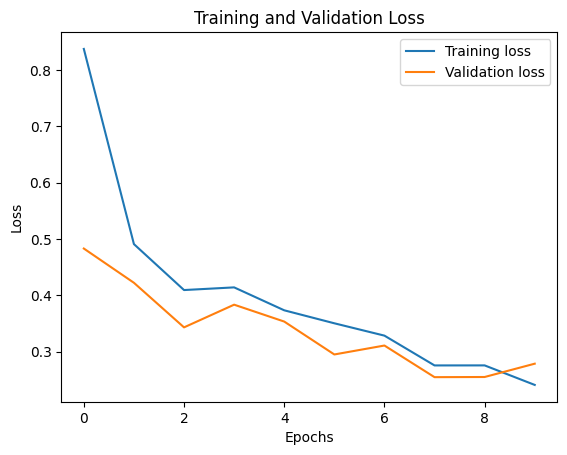

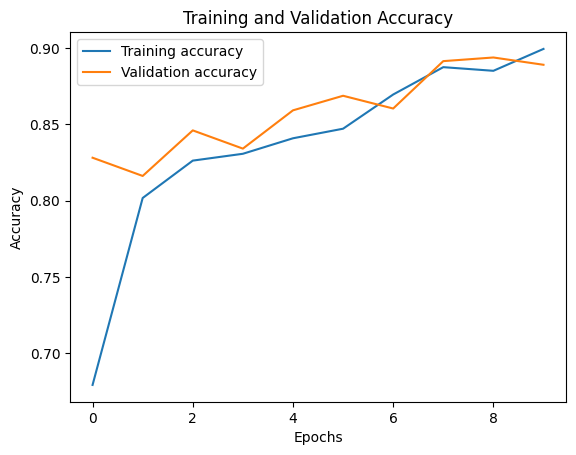

In [ ]:
# Визуализация результатов обучения
import matplotlib.pyplot as plt

# Тренировочные и валидационные потери
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Тренировочная и валидационная точность
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 714.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
t

In [ ]:
import autokeras as ak
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
# Загружаем данные (предполагается, что они уже сохранены в 'processed_data.npz')
data = np.load("/content/drive/MyDrive/processed_data.npz")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

In [ ]:
# Использование AutoKeras для классификации изображений
clf = ak.ImageClassifier(
    overwrite=True,  # Ожидаем перезапись модели, если уже была обучена
    max_trials=2  # Количество попыток (моделей), которые AutoKeras попробует
)

In [ ]:
# Уменьшаем размер данных
X_train_small = X_train[:500]
y_train_small = y_train[:500]
X_test_small = X_test[:100]
y_test_small = y_test[:100]

# Обучение AutoKeras с уменьшенными данными
clf = ak.ImageClassifier(overwrite=True, max_trials=2)
clf.fit(X_train_small, y_train_small, epochs=10)

Trial 2 Complete [00h 02m 33s]
val_loss: 1.3873980045318604

Best val_loss So Far: 0.46526893973350525
Total elapsed time: 00h 03m 19s
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 658ms/step - accuracy: 0.4112 - loss: 10.9612
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.5794 - loss: 0.9049
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.6031 - loss: 0.8449
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.7019 - loss: 0.7782
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.8034 - loss: 0.6015
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.8281 - loss: 0.4387
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8603 - loss: 0.4026
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9404 - loss: 0.2212
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9699 - loss: 0.1141
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9791 - loss: 0.0864


In [ ]:
# Обучение модели с использованием AutoKeras
clf.fit(X_train, y_train, epochs=10)

In [ ]:
# Оценка модели AutoKeras
y_pred = clf.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [ ]:
# Оценка точности
accuracy_automl = accuracy_score(y_test_classes, y_pred_classes)
print(f"AutoKeras Test Accuracy: {accuracy_automl:.4f}")

AutoKeras Test Accuracy: 0.8162


In [ ]:
from tensorflow.keras.models import load_model
# Сравнение с вашей моделью на Keras
# Пример того, как получить точность с вашей модели:
model = load_model("/content/drive/MyDrive/corn_disease_classifier.keras")
y_pred_keras = model.predict(X_test)
y_pred_keras_classes = np.argmax(y_pred_keras, axis=1)
accuracy_keras = accuracy_score(y_test_classes, y_pred_keras_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [ ]:
print(f"Keras Model Test Accuracy: {accuracy_keras:.4f}")

# Выводим результат сравнения
print(f"Comparison - AutoKeras Accuracy: {accuracy_automl:.4f}, Keras Model Accuracy: {accuracy_keras:.4f}")


Keras Model Test Accuracy: 0.8914
Comparison - AutoKeras Accuracy: 0.8162, Keras Model Accuracy: 0.8914


весь код

In [ ]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import autokeras as ak

# Загрузка данных из файла .npz
data = np.load("/content/drive/MyDrive/processed_data(small).npz")

# Извлечение массивов
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

# Проверка форм данных
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Создание модели нейронной сети
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Добавим Dropout для предотвращения переобучения
    Dense(4, activation='softmax')  # 4 класса
])

# Компиляция модели
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Настройка обратного вызова для ранней остановки
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

# Оценка точности
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Сохранение модели
model.save("/content/drive/MyDrive/corn_disease_classifier.keras")

import numpy as np
# Загружаем данные (предполагается, что они уже сохранены в 'processed_data.npz')
data = np.load("/content/drive/MyDrive/processed_data(small).npz")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

# Использование AutoKeras для классификации изображений
clf = ak.ImageClassifier(
    overwrite=True,  # Ожидаем перезапись модели, если уже была обучена
    max_trials=2  # Количество попыток (моделей), которые AutoKeras попробует
)

# Обучение модели с использованием AutoKeras
clf.fit(X_train, y_train, epochs=10)

# Оценка модели AutoKeras
y_pred = clf.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

# Оценка точности
accuracy_automl = accuracy_score(y_test_classes, y_pred_classes)
print(f"AutoKeras Test Accuracy: {accuracy_automl:.4f}")

# Сравнение с вашей моделью на Keras
# Пример того, как получить точность с вашей модели:
model = load_model("/content/drive/MyDrive/corn_disease_classifier.keras")
y_pred_keras = model.predict(X_test)
y_pred_keras_classes = np.argmax(y_pred_keras, axis=1)
accuracy_keras = accuracy_score(y_test_classes, y_pred_keras_classes)

print(f"Keras Model Test Accuracy: {accuracy_keras:.4f}")

# Выводим результат сравнения
print(f"Comparison - AutoKeras Accuracy: {accuracy_automl:.4f}, Keras Model Accuracy: {accuracy_keras:.4f}")



Trial 2 Complete [00h 09m 52s]
val_loss: 0.5178412199020386

Best val_loss So Far: 0.35354334115982056
Total elapsed time: 00h 10m 10s
Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6316 - loss: 0.8871
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8253 - loss: 0.4206
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8506 - loss: 0.3528
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8694 - loss: 0.3136
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8896 - loss: 0.2608
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9048 - loss: 0.2446
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9182 - loss: 0.1957
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9484 - loss: 0.1610
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9438 - loss: 0.1572
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9546 - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AutoKeras Test Accuracy: 0.8807
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Keras Model Test Accuracy: 0.9129
Comparison - AutoKeras Accuracy: 0.8807, Keras Model Accuracy: 0.9129


In [ ]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.6 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=166a80541af2b906dc0e1036f4d80ebb1a718f0ac758919456e2c268f31442bb
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Загрузка предварительно обработанных данных
data = np.load("/content/drive/MyDrive/processed_data(small).npz")
X_train = data["X_train"].reshape(data["X_train"].shape[0], -1)  # Преобразуем изображения в векторы
X_test = data["X_test"].reshape(data["X_test"].shape[0], -1)
y_train = np.argmax(data["y_train"], axis=1)  # Преобразуем one-hot в классы
y_test = np.argmax(data["y_test"], axis=1)

# Настройка TPOT AutoML
tpot = TPOTClassifier(
    generations=5,              # Количество поколений для оптимизации
    population_size=20,         # Размер популяции
    verbosity=2,                # Уровень детализации логов
    max_time_mins=60,           # Лимит времени (в минутах)
    random_state=42,
    config_dict='TPOT light',   # Используем облегчённые модели
    n_jobs=-1                   # Задействуем все доступные ядра
)

# Обучение TPOT
tpot.fit(X_train, y_train)

# Оценка точности
y_pred = tpot.predict(X_test)
accuracy_tpot = accuracy_score(y_test, y_pred)
print(f"TPOT Test Accuracy: {accuracy_tpot:.4f}")

# Экспорт лучшего пайплайна
tpot.export('/content/drive/MyDrive/tpot_best_pipeline.py')


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_regressor


Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7940298507462688

Generation 2 - Current best internal CV score: 0.7967164179104478

61.80 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=21, p=1, weights=uniform)
TPOT Test Accuracy: 0.8389


In [ ]:
!pip install featuretools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 18.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import featuretools as ft
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Загрузка данных
data = np.load("/content/drive/MyDrive/processed_data(small).npz")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = np.argmax(data["y_train"], axis=1)
y_test = np.argmax(data["y_test"], axis=1)

# Шаг 1. Использование предобученной сети для извлечения признаков
base_model = VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

# Преобразование изображений в векторы признаков
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Усреднение по пространственным осям
X_train_features = X_train_features.mean(axis=(1, 2))
X_test_features = X_test_features.mean(axis=(1, 2))

# Преобразование в DataFrame
train_df = pd.DataFrame(X_train_features)
train_df['label'] = y_train
train_df.columns = train_df.columns.astype(str)

# Шаг 2. Генерация фич с помощью Featuretools
es = ft.EntitySet(id="corn_disease")

# Добавление данных в виде DataFrame
es = es.add_dataframe(
    dataframe_name="data",  # Имя датафрейма
    dataframe=train_df,     # Данные
    index="index",          # Уникальный идентификатор строки
    make_index=True         # Генерировать новый индекс, если его нет
)

# Создание новых признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="data",  # Заменяет target_entity
    agg_primitives=["mean", "sum", "mode"],  # Агрегации
    trans_primitives=["day", "month", "year"],  # Трансформации
    verbose=True
)

# Проверяем итоговые признаки
print(feature_matrix.head())

# Разделение данных для обучения
X_train_ft = feature_matrix.values
X_train_ft, X_val_ft, y_train_ft, y_val_ft = train_test_split(
    X_train_ft, y_train, test_size=0.2, random_state=42
)


105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'month', 'year']
  agg_primitives: ['mean', 'mode', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 513 features
Elapsed: 00:00 | Progress: 100%|██████████
              0    1         2    3         4    5    6         7    8  \
index                                                                    
0      0.502096  0.0  0.210674  0.0  0.000000  0.0  0.0  0.173196  0.0   
1      1.428511  0.0  0.028266  0.0  0.010643  0.0  0.0  1.444544  0.0   
2      1.275220  0.0  0.000000  0.0  0.000000  0.0  0.0  1.200451  0.0   
3      0.611998  0.0  0.000000  0.0  0.123402  0.0  0.0  0.219100  0.0   
4      0.747280  0.0  0.109435  0.0  0.000000  0.0  0.0  0.398154  0.0   

              9  ...       503       504       505       506       507  508  \
index            ...                                                          
0      0.000000  ...  0.477042  0.069057  0.032377  0.065848  0.215296  0.0   
1      0.000000  ...  0.333445  0.000000  0.000000  0.030854  0.178889  0.0   
2      0.612619  ...  0.212730  0.127565  0.000000  0.041330  0.184730  0.0   
3      0.004321  ...  0.

In [ ]:
pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
# Шаг 3. Использование новых фич для обучения модели (например, XGBoost)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Обучение модели
model = XGBClassifier()
model.fit(X_train_ft, y_train_ft)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Оценка модели
y_val_pred = model.predict(X_val_ft)
accuracy = accuracy_score(y_val_ft, y_val_pred)
print(f"Accuracy with generated features: {accuracy:.4f}")

Accuracy with generated features: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), feature_matrix, y_train, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy: 0.9540


Увеличим данные

In [ ]:
pip install featuretools scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import featuretools as ft
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Загрузка данных
data = np.load("/content/drive/MyDrive/processed_data(medium).npz")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = np.argmax(data["y_train"], axis=1)
y_test = np.argmax(data["y_test"], axis=1)

# Шаг 1. Использование предобученной сети для извлечения признаков
base_model = VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

# Преобразование изображений в векторы признаков
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Усреднение по пространственным осям
X_train_features = X_train_features.mean(axis=(1, 2))
X_test_features = X_test_features.mean(axis=(1, 2))

# Преобразование в DataFrame
train_df = pd.DataFrame(X_train_features)
train_df['label'] = y_train
train_df.columns = train_df.columns.astype(str)

# Создание EntitySet только для тренировочных данных
es = ft.EntitySet(id="corn_disease")
es = es.add_dataframe(
    dataframe_name="train_data",  # Имя DataFrame
    dataframe=train_df,
    index="index",
    make_index=True
)

# Создание новых признаков на тренировочных данных
train_feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="train_data",
    agg_primitives=["mean", "sum", "mode"],
    trans_primitives=["day", "month", "year"],
    verbose=True
)

# Создание EntitySet для валидационных данных с тем же именем DataFrame
es_val = ft.EntitySet(id="corn_disease_val")
es_val = es_val.add_dataframe(
    dataframe_name="train_data",  # Имя совпадает с тренировочным DataFrame
    dataframe=val_df,  # Валидационный DataFrame
    index="index",
    make_index=True
)

# Применение признаков к валидационным данным
val_feature_matrix = ft.calculate_feature_matrix(
    features=feature_defs,  # Признаки, созданные на тренировочных данных
    entityset=es_val        # Валидационный EntitySet
)

# Разделение данных на X и y
X_train_ft = train_feature_matrix.values
X_val_ft = val_feature_matrix.values


105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'month', 'year']
  agg_primitives: ['mean', 'mode', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 513 features
Elapsed: 00:00 | Progress: 100%|██████████


/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, make_index, dataframe_name
  warnings.warn(


KeyError: 'DataFrame train_data does not exist in corn_disease_val'

In [ ]:
# Шаг 3. Использование новых фич для обучения модели (например, XGBoost)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Обучение модели
model = XGBClassifier()
model.fit(X_train_ft, y_train_ft)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Оценка модели
y_val_pred = model.predict(X_val_ft)
accuracy = accuracy_score(y_val_ft, y_val_pred)
print(f"Accuracy with generated features: {accuracy:.4f}")

Accuracy with generated features: 0.2358


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), feature_matrix, y_train, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy: 0.9531


In [1]:
!pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              24.3.0
audioread                          3.0.1
autograd             